# Statistical Significance

In [1]:
import sklearn
import numpy as np
import matplotlib
import pandas as pd
import sklearn
from platform import python_version

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import pandas as pd

print("Python version:     ", python_version())
print("sklearn version:    ", sklearn.__version__)
print("numpy version:      ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("pandas version:     ", pd.__version__)
print("sklearn version:    ", sklearn.__version__)


Python version:      3.9.13
sklearn version:     1.0.2
numpy version:       1.21.5
matplotlib version:  3.5.2
pandas version:      1.4.4
sklearn version:     1.0.2


## 6.2 Null Hypothesis Statistical Testing
### 6.2.2 Comparing Two Classifiers on Multiple Domains
#### Table 6.1 Wilcoxon's Signed-Ranks Test

In [2]:
# Load BreastCancer Dataset
bc_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
bc_data = pd.read_csv(bc_link, header = None)
X_0 = bc_data.iloc[:,2:33].to_numpy()

y_0= bc_data.iloc[:,1].to_numpy()

# Load Liver Dataset
liv_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data"
liv_data = pd.read_csv(liv_link, header = None)
X_1 = liv_data.iloc[:,0:5].to_numpy()
y_1= liv_data.iloc[:,6].to_numpy()

# Load Balance Scale Dataset
balance_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
balance_data = pd.read_csv(balance_link, header=None)
# X_2 = balance_data.iloc[:,1:4].to_numpy()
# y_2= balance_data.iloc[:,0].to_numpy()

# Load Contact Lenses Dataset
contacts_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/lenses/lenses.data"
contacts_data = pd.read_csv(contacts_link, header=None, delimiter=r"\s+")
X_3 = contacts_data.iloc[:,2:5].astype("category").to_numpy()
y_3= contacts_data.iloc[:,1].astype("category").to_numpy()

# Load Pima Diabetes Dataset
#diabetes_link = 
# The dataset is no longer available on UCI, permission restrictions were cited

# Glass Dataset
glass_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glass_data = pd.read_csv(glass_link, header=None)
X_4 = glass_data.iloc[:,1:10].to_numpy()
y_4= glass_data.iloc[:,10].to_numpy()

# Hepatitis Dataset
hepatitis_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
hepatitis_data = pd.read_csv(hepatitis_link, header=None)
# X_5 = hepatitis_data.iloc[:,1:].to_numpy()
# y_5 = hepatitis_data.iloc[:,0].to_numpy()

#https://raw.githubusercontent.com/Sunday-Okey/Pandas_Lesson_Colab/main/data/cleaned_hepatitis_data.csv
# Hypothyroid Dataset
hypothyroid_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.data"
hypothyroid_data = pd.read_csv(hypothyroid_link, header=None)

# Load Anneal Dataset
anneal_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data"
anneal_data = pd.read_csv(anneal_link, header = None)
#X_2 = liv_data.iloc[:,0:5].to_numpy()
#y_2= liv_data.iloc[:,6].to_numpy()

# Tic-Tag-Toe Dataset
tic_tac_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
tic_tac_data = pd.read_csv(tic_tac_link, header = None)


### Data Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to integers
le = LabelEncoder()
y_0 = le.fit_transform(y_0)

# Check that labels are now in the expected format
print(np.unique(y_0))

[0 1]


In [4]:
anneal_data.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


In [5]:
anneal_data = anneal_data.applymap(lambda x: np.nan if x == '?' else x)

In [6]:
# Drop columns with more than 600 null values
null_counts = anneal_data.isnull().sum()
to_drop = null_counts[null_counts > 600].index
anneal_data = anneal_data.drop(to_drop, axis=1)
anneal_data = anneal_data.T.reset_index(drop=True).T
anneal_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,C,A,8,0,S,NaN,0,G,COIL,0.7,610.0,0,0,3
1,C,R,0,0,S,2,0,E,COIL,3.2,610.0,0,0,3
2,C,R,0,0,S,2,0,E,SHEET,0.7,1300.0,762,0,3
3,C,A,0,60,NaN,NaN,0,G,COIL,2.801,385.1,0,0,3
4,C,A,0,60,NaN,NaN,0,G,SHEET,0.801,255.0,269,0,3


In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(anneal_data)
imputer_train_df = imputer.transform(anneal_data)
imputed_df = pd.DataFrame(imputer_train_df)
imputed_df.iloc[:,-1].value_counts()

3    608
2     88
5     60
U     34
1      8
Name: 13, dtype: int64

In [8]:
imputed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,C,A,8,0,S,2,0,G,COIL,0.7,610.0,0,0,3
1,C,R,0,0,S,2,0,E,COIL,3.2,610.0,0,0,3
2,C,R,0,0,S,2,0,E,SHEET,0.7,1300.0,762,0,3
3,C,A,0,60,S,2,0,G,COIL,2.801,385.1,0,0,3
4,C,A,0,60,S,2,0,G,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,S,2,0,G,COIL,1.001,50.0,0,0,3
794,C,A,0,0,S,1,0,G,SHEET,0.699,1300.0,4880,0,3
795,C,A,0,0,S,2,0,E,COIL,0.4,609.9,0,0,3
796,C,A,0,0,S,2,0,G,SHEET,3.2,610.0,4880,0,3


In [9]:
categorical_cols = [0, 1,4,7, 8]

In [10]:
# apply le on categorical feature columns
imputed_df[categorical_cols] = imputed_df[categorical_cols].apply(lambda col: le.fit_transform(col))
imputed_df[categorical_cols].head(10)

,0,1,4,7,8
0,0,0,1,3,0
1,0,3,1,1,0
2,0,3,1,1,1
3,0,0,1,3,0
4,0,0,1,3,1
5,0,0,1,0,0
6,0,3,1,1,1
7,0,0,1,1,0
8,0,3,1,1,0
9,0,0,1,1,1


In [11]:
imputed_df.iloc[:,-1] = imputed_df.iloc[:,-1].map(lambda x: 4 if x == 'U' else x)

In [12]:
imputed_df.iloc[:,-1].value_counts()

3    608
2     88
5     60
4     34
1      8
Name: 13, dtype: int64

In [13]:
# # Get dummies
# anneal_data = pd.get_dummies(anneal_data)
# # X head
# len(anneal_data.columns)
imputed_df = imputed_df.astype(float)
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       798 non-null    float64
 1   1       798 non-null    float64
 2   2       798 non-null    float64
 3   3       798 non-null    float64
 4   4       798 non-null    float64
 5   5       798 non-null    float64
 6   6       798 non-null    float64
 7   7       798 non-null    float64
 8   8       798 non-null    float64
 9   9       798 non-null    float64
 10  10      798 non-null    float64
 11  11      798 non-null    float64
 12  12      798 non-null    float64
 13  13      798 non-null    float64
dtypes: float64(14)
memory usage: 87.4 KB


In [14]:
X_9 = imputed_df.iloc[:,:-1]
y_9 = imputed_df.iloc[:,-1]

#### Balance Data

In [15]:
balance_data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [16]:
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       625 non-null    object
 1   1       625 non-null    int64 
 2   2       625 non-null    int64 
 3   3       625 non-null    int64 
 4   4       625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [17]:
#Convert the target variable into numbers
balance_data.iloc[:, 0] = balance_data.iloc[:, 0].apply(lambda x: 0 if x == 'B' else (1 if x == 'R' else 2))
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       625 non-null    int64
 1   1       625 non-null    int64
 2   2       625 non-null    int64
 3   3       625 non-null    int64
 4   4       625 non-null    int64
dtypes: int64(5)
memory usage: 24.5 KB


In [18]:
X_2 = balance_data.iloc[:,1:]
y_2 = balance_data.iloc[:,0]

#### Hepatitis Data

In [19]:
hepatitis_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [20]:
column_names = ['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
            'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS', 'ASCITES',
            'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']
features = []
i = 0
while i < len(column_names):
    feature = column_names[i].lower().replace(' ', '_')
    features.append(feature)
    i += 1
    
    
len(features)

20

In [21]:
hepatitis_data.columns = features
hepatitis_data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [22]:
#let's replace ? with NA
hepatitis_data.replace("?",np.nan, inplace = True)
hepatitis_data.isnull().sum()

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

In [23]:
hepatitis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          154 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          154 non-null    object
 6   malaise          154 non-null    object
 7   anorexia         154 non-null    object
 8   liver_big        145 non-null    object
 9   liver_firm       144 non-null    object
 10  spleen_palpable  150 non-null    object
 11  spiders          150 non-null    object
 12  ascites          150 non-null    object
 13  varices          150 non-null    object
 14  bilirubin        149 non-null    object
 15  alk_phosphate    126 non-null    object
 16  sgot             151 non-null    object
 17  albumin          139 non-null    ob

In [24]:
numerical_variables = ['age', 'bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot']

In [25]:
hepatitis_data[numerical_variables] = hepatitis_data[numerical_variables].astype(float)
hepatitis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    float64
 2   sex              155 non-null    int64  
 3   steroid          154 non-null    object 
 4   antivirals       155 non-null    int64  
 5   fatigue          154 non-null    object 
 6   malaise          154 non-null    object 
 7   anorexia         154 non-null    object 
 8   liver_big        145 non-null    object 
 9   liver_firm       144 non-null    object 
 10  spleen_palpable  150 non-null    object 
 11  spiders          150 non-null    object 
 12  ascites          150 non-null    object 
 13  varices          150 non-null    object 
 14  bilirubin        149 non-null    float64
 15  alk_phosphate    126 non-null    float64
 16  sgot             151 non-null    float64
 17  albumin         

In [26]:
categorical_variables = ['sex' , 'steroid', 'antivirals', 'fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable',
'spiders','ascites','varices', 'histology']

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(hepatitis_data)
imputer_train_df = imputer.transform(hepatitis_data)
imputer_train_df

array([[2, 30.0, 2, ..., 4.0, 100.0, 1],
       [2, 50.0, 1, ..., 3.5, 100.0, 1],
       [2, 78.0, 1, ..., 4.0, 100.0, 1],
       ...,
       [2, 61.0, 1, ..., 4.1, 100.0, 2],
       [2, 53.0, 2, ..., 4.1, 48.0, 2],
       [1, 43.0, 1, ..., 3.1, 42.0, 2]], dtype=object)

In [28]:
imputed_df = pd.DataFrame(imputer_train_df,columns=features)
imputed_df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30.0,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18.0,4.0,100.0,1
1,2,50.0,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42.0,3.5,100.0,1
2,2,78.0,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32.0,4.0,100.0,1
3,2,31.0,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52.0,4.0,80.0,1
4,2,34.0,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85.0,200.0,4.0,100.0,1


In [29]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    object
 1   age              155 non-null    object
 2   sex              155 non-null    object
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    object
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

In [30]:
imputed_df[categorical_variables] = imputed_df[categorical_variables].astype(int)
imputed_df["class"] = imputed_df["class"].astype(int)

In [31]:
imputed_df[numerical_variables] = imputed_df[numerical_variables].astype(float)

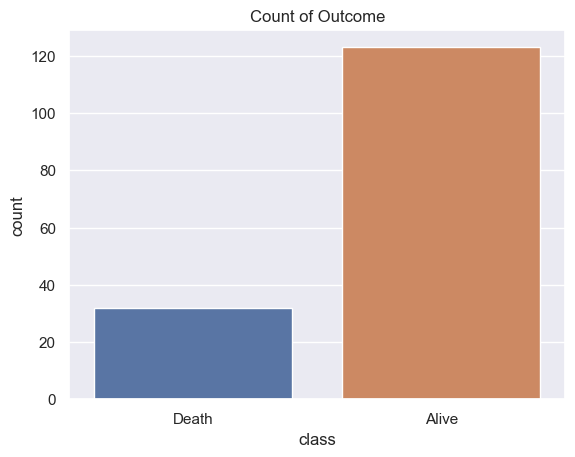

In [32]:
class_count=sns.countplot(x="class", data=imputed_df)
plt.gca().set_xticklabels(['Death','Alive']);
class_count.set_title("Count of Outcome")
class_count.figure.savefig('class_count.png')

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import cross_validate
sc=StandardScaler()
sc.fit(imputed_df.drop(["class"], axis = 1))
scaled_features = sc.transform(imputed_df.drop(["class"], axis = 1))
X_5 =scaled_features
y_5 = imputed_df["class"] 

#### Hypothyroid Data

In [34]:
hypothyroid_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [35]:
hypothyroid_data=hypothyroid_data.replace({"?":np.NAN})
hypothyroid_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,NaN


In [36]:
hypothyroid_data.columns = ['binary_class','age','sex','on_thyroxine','query_on_thyroxine',
                            'on_antithyroid_medication','thyroid_surgery','query_hypothyroid',
                            'query_hyperthyroid','pregnant','sick','tumor','lithium','goitre',
                            'TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4',
                            'T4U_measured','T4U','FTI_measured','FTI', 'BG_measured','TBG']
hypothyroid_data.binary_class.value_counts()

negative       3012
hypothyroid     151
Name: binary_class, dtype: int64

In [37]:
hypothyroid_data.sex.value_counts(dropna=False)

F      2182
M       908
NaN      73
Name: sex, dtype: int64

In [38]:
hypothyroid_data.isnull().sum()

binary_class                    0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
BG_measured                     0
TBG                          2903
dtype: int64

In [39]:
hypothyroid_data.drop('TBG', axis = 1, inplace=True)

In [40]:
def convert_to_numeric(value):
    if value in ['t', 'y', 'hypothyroid', 'M']:
        return 1
    elif value in ['f', 'n', 'negative']:
        return 0
    elif value == 'F':
        return 2
    else:
        return value

def convert_df_values(df):
    df = df.applymap(convert_to_numeric)
    return df

In [41]:
hypothyroid_data = convert_df_values(hypothyroid_data)
hypothyroid_data.head()

,binary_class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,BG_measured
0,1,72,1.0,0,0,0,0,0,0,0,...,30,1,0.60,1,15,1,1.48,1,10,0
1,1,15,2.0,1,0,0,0,0,0,0,...,145,1,1.70,1,19,1,1.13,1,17,0
2,1,24,1.0,0,0,0,0,0,0,0,...,0,1,0.20,1,4,1,1,1,0,0
3,1,24,2.0,0,0,0,0,0,0,0,...,430,1,0.40,1,6,1,1.04,1,6,0
4,1,77,1.0,0,0,0,0,0,0,0,...,7.30,1,1.20,1,57,1,1.28,1,44,0


In [42]:
hypothyroid_data.sex.value_counts()

2.0    2182
1.0     908
Name: sex, dtype: int64

In [43]:
hypothyroid_data.dtypes

binary_class                   int64
age                           object
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                           object
T3_measured                    int64
T3                            object
TT4_measured                   int64
TT4                           object
T4U_measured                   int64
T4U                           object
FTI_measured                   int64
FTI                           object
BG_measured                    int64
dtype: object

In [44]:
cols = hypothyroid_data.columns[hypothyroid_data.dtypes.eq('object')]
hypothyroid_data[cols] = hypothyroid_data[cols].apply(pd.to_numeric, errors='coerce')
hypothyroid_data.dtypes

binary_class                   int64
age                          float64
sex                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
BG_measured                    int64
dtype: object

In [45]:
hypothyroid_data.isnull().sum()

binary_class                   0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
BG_measured                    0
dtype: int64

In [46]:
hypothyroid_data['age'].fillna(hypothyroid_data['age'].mean(), inplace=True)

In [47]:
categorical_variables = ['sex','TSH', 'T3', 'TT4', 'T4U', 'FTI']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer.fit(hypothyroid_data)
imputer_train_df = imputer.transform(hypothyroid_data)
imputer_train_df

C:\Users\Sunday Okechukwu\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


array([[  1.,  72.,   1., ...,   1.,  10.,   0.],
       [  1.,  15.,   2., ...,   1.,  17.,   0.],
       [  1.,  24.,   1., ...,   1.,   0.,   0.],
       ...,
       [  0.,  77.,   1., ...,   1., 104.,   0.],
       [  0.,  74.,   2., ...,   1., 137.,   0.],
       [  0.,  56.,   2., ...,   1., 143.,   0.]])

In [48]:
imputed_df = pd.DataFrame(imputer_train_df,columns=hypothyroid_data.columns)
imputed_df

,binary_class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,BG_measured
0,1.0,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,1.0,0.6,1.0,15.0,1.0,1.48,1.0,10.0,0.0
1,1.0,15.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,145.0,1.0,1.7,1.0,19.0,1.0,1.13,1.0,17.0,0.0
2,1.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.2,1.0,4.0,1.0,1.00,1.0,0.0,0.0
3,1.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,430.0,1.0,0.4,1.0,6.0,1.0,1.04,1.0,6.0,0.0
4,1.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.3,1.0,1.2,1.0,57.0,1.0,1.28,1.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0.0,58.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.8,1.0,1.7,1.0,86.0,1.0,0.91,1.0,95.0,0.0
3159,0.0,29.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,1.0,1.8,1.0,99.0,1.0,1.01,1.0,98.0,0.0
3160,0.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.2,1.0,0.6,1.0,71.0,1.0,0.68,1.0,104.0,0.0
3161,0.0,74.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,1.0,0.1,1.0,65.0,1.0,0.48,1.0,137.0,0.0


In [49]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   binary_class               3163 non-null   float64
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   float64
 3   on_thyroxine               3163 non-null   float64
 4   query_on_thyroxine         3163 non-null   float64
 5   on_antithyroid_medication  3163 non-null   float64
 6   thyroid_surgery            3163 non-null   float64
 7   query_hypothyroid          3163 non-null   float64
 8   query_hyperthyroid         3163 non-null   float64
 9   pregnant                   3163 non-null   float64
 10  sick                       3163 non-null   float64
 11  tumor                      3163 non-null   float64
 12  lithium                    3163 non-null   float64
 13  goitre                     3163 non-null   float

In [50]:
imputed_df.isnull().sum()

binary_class                 0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
BG_measured                  0
dtype: int64

In [51]:
imputed_df.sex.value_counts()

2.0    2255
1.0     908
Name: sex, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import cross_validate
sc=StandardScaler()
sc.fit(imputed_df.drop(["binary_class"], axis = 1))
scaled_features = sc.transform(imputed_df.drop(["binary_class"], axis = 1))
X_6 = scaled_features
y_6 = imputed_df["binary_class"] 




#### Tic Tac Toe Data

In [53]:
tic_tac_data.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [54]:
tic_tac_data.iloc[:,-1].value_counts()

positive    626
negative    332
Name: 9, dtype: int64

In [55]:
tic_tac_data.iloc[:,0].value_counts()

x    418
o    335
b    205
Name: 0, dtype: int64

In [56]:
tic_tac_data[9]

0      positive
1      positive
2      positive
3      positive
4      positive
         ...   
953    negative
954    negative
955    negative
956    negative
957    negative
Name: 9, Length: 958, dtype: object

In [57]:
def tic_tac(df):
    rows = list(df.columns)
    for row in rows[:-1]:
        df[row] = df[row].map(lambda x: 0 if x == 'x' else (1 if x == 'o' else 2))
    df[rows[-1]] = df[rows[-1]].map(lambda x: 0 if x == 'negative' else '1')
    return df
 

In [58]:
df = tic_tac(tic_tac_data)
df.iloc[:,-1].value_counts()

1    626
0    332
Name: 9, dtype: int64

In [59]:

df.iloc[:,0].value_counts()

0    418
1    335
2    205
Name: 0, dtype: int64

In [60]:
X_7 = df.iloc[:,:-1].astype('int')
y_7 = df.iloc[:,-1].astype('int')

In [61]:
y_7

0      1
1      1
2      1
3      1
4      1
      ..
953    0
954    0
955    0
956    0
957    0
Name: 9, Length: 958, dtype: int32

#### Diabetes Data

In [62]:
import os
import urllib.request

# Create a folder in my local machine if not already exist
folder_name = "Research_Work"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Download the file as a csv file from the internet
url = "https://raw.githubusercontent.com/Sunday-Okey/Pandas_Lesson_Colab/main/data/diabetes.csv"
file_name = "data.csv"
urllib.request.urlretrieve(url, folder_name + "/" + file_name)

print(f"File downloaded and stored in {folder_name}")

File downloaded and stored in Research_Work


In [63]:
diabetes = pd.read_csv('Research_Work/data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
X_8 = diabetes.iloc[:,:-1]
y_8 = diabetes.iloc[:, -1]

In [65]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Split data:

In [66]:
y_8.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

# Breast Cancer
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size=0.20, random_state=42)

# Liver
# Split data into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.20, random_state=42)

# Balance Scale
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=42)

# Contact Lenses
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.20, random_state=42)

# Glass
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.20, random_state=42)

# Hepatitis
# Split data into training and testing sets
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.20, random_state=42)

#hypothyroid_data
# Split data into training and testing sets
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6,y_6,test_size=0.2,random_state=42)

# Tic_Tac_Toe
# Split data into training and testing sets
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size=0.20, random_state=42)

#diabetes_data
# Split data into training and testing sets
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.20, random_state=42)

X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9, test_size=0.20, random_state=42)

Train classifiers:

In [68]:
# Breast_Cancer
np.random.seed(42)
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()
NBclf.fit(X_train, y_train)
nb_preds = NBclf.predict(X_test)

# SVM
from sklearn.svm import SVC
SVMclf = SVC()
SVMclf.fit(X_train, y_train)
svm_preds = SVMclf.predict(X_test)

# Liver

np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_1, y_train_1)
nb_preds_1 = NBclf.predict(X_test_1)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_1, y_train_1)
svm_preds_1 = SVMclf.predict(X_test_1)


In [69]:
# Balance Scale
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_2, y_train_2)
nb_preds_2 = NBclf.predict(X_test_2)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_2, y_train_2)
svm_preds_2 = SVMclf.predict(X_test_2)


# Contact Lenses
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_3, y_train_3)
nb_preds_3 = NBclf.predict(X_test_3)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_3, y_train_3)
svm_preds_3 = SVMclf.predict(X_test_3)

# Glass
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_4, y_train_4)
nb_preds_4 = NBclf.predict(X_test_4)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_4, y_train_4)
svm_preds_4 = SVMclf.predict(X_test_4)

# Hepatitis
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_5, y_train_5)
nb_preds_5 = NBclf.predict(X_test_5)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_5, y_train_5)
svm_preds_5 = SVMclf.predict(X_test_5)

#hypothyroid_data
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_6, y_train_6)
nb_preds_6 = NBclf.predict(X_test_6)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_6, y_train_6)
svm_preds_6 = SVMclf.predict(X_test_6)

# Tic_Tac_Toe
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_7, y_train_7)
nb_preds_7 = NBclf.predict(X_test_7)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_7, y_train_7)
svm_preds_7 = SVMclf.predict(X_test_7)

# Diabetes
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_8, y_train_8)
nb_preds_8 = NBclf.predict(X_test_8)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_8, y_train_8)
svm_preds_8 = SVMclf.predict(X_test_8)

In [70]:
# Diabetes
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_8, y_train_8)
nb_preds_8 = NBclf.predict(X_test_8)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_8, y_train_8)
svm_preds_8 = SVMclf.predict(X_test_8)

# Anneal 
np.random.seed(42)
# Naive Bayes
NBclf = GaussianNB()
NBclf.fit(X_train_9, y_train_9)
nb_preds_9 = NBclf.predict(X_test_9)

# SVM
SVMclf = SVC()
SVMclf.fit(X_train_9, y_train_9)
svm_preds_9 = SVMclf.predict(X_test_9)

In [71]:
from sklearn.metrics import accuracy_score
results = pd.DataFrame({
    "NB Accuracy" : [accuracy_score(y_test, nb_preds), accuracy_score(y_test_1, nb_preds_1),
                    accuracy_score(y_test_2, nb_preds_2), accuracy_score(y_test_3, nb_preds_3),
                    accuracy_score(y_test_4, nb_preds_4), accuracy_score(y_test_5, nb_preds_5),
                    accuracy_score(y_test_6, nb_preds_6),accuracy_score(y_test_7, nb_preds_7),
                    accuracy_score(y_test_8, nb_preds_8), accuracy_score(y_test_9, nb_preds_9)],
    "SVM Accuracy" : [accuracy_score(y_test, svm_preds), accuracy_score(y_test_1, svm_preds_1),
                     accuracy_score(y_test_2, svm_preds_2),accuracy_score(y_test_3, svm_preds_3),
                     accuracy_score(y_test_4, svm_preds_4), accuracy_score(y_test_5, svm_preds_5),
                     accuracy_score(y_test_6, svm_preds_6), accuracy_score(y_test_7, svm_preds_7),
                     accuracy_score(y_test_8, svm_preds_8), accuracy_score(y_test_9, svm_preds_9)],
    }
)

results["NB-SVM"] = results["NB Accuracy"] - results["SVM Accuracy"]
results["|NB-SVM|"] = abs(results["NB-SVM"])
order = results["|NB-SVM|"].argsort()
results["Ranks(|NB-SVM|)"] = order.argsort() + 1
results["+/- Ranks(|NB-SVM|)"] = results["Ranks(|NB-SVM|)"] * (results["NB-SVM"] / results["|NB-SVM|"])

results.fillna('remove', inplace = True)
results.index = np.arange(1, len(results) + 1)
results['Domain No.'] = results.index 

results.set_index('Domain No.', inplace = True)
results

,NB Accuracy,SVM Accuracy,NB-SVM,|NB-SVM|,Ranks(|NB-SVM|),+/- Ranks(|NB-SVM|)
Domain No.,,,,,,
1,0.973684,0.947368,0.026316,0.026316,4,4.0
2,0.492754,0.710145,-0.217391,0.217391,7,-7.0
3,0.888000,0.904000,-0.016000,0.016000,3,-3.0
4,0.200000,0.200000,0.000000,0.000000,1,remove
5,0.558140,0.325581,0.232558,0.232558,8,8.0
6,0.645161,0.709677,-0.064516,0.064516,5,-5.0
7,0.214850,0.974724,-0.759874,0.759874,10,-10.0
8,0.708333,0.880208,-0.171875,0.171875,6,-6.0
9,0.766234,0.766234,0.000000,0.000000,2,remove


In [72]:
from scipy.stats import wilcoxon
wilcoxon_test = wilcoxon(results["NB-SVM"])
wilcoxon_test.statistic, wilcoxon_test.pvalue

C:\Users\Sunday Okechukwu\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Sunday Okechukwu\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(8.0, 0.16142946236708333)

In [73]:
# import pandas as pd
# from sklearn.datasets import load_digits, load_breast_cancer, load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC

# # Load the datasets
# datasets = [
#     ('Breast Cancer', load_digits()),
#     ('Liver', load_breast_cancer()),
#     ('Balance Scale', load_iris()),
#     ('Contact Lenses', load_iris()),
#     ('Glass', load_iris()),
#     ('Hepatitis', load_iris()),
#     ('Hypothyroid', load_iris()),
#     ('Tic tac toe',)
# 'diabetes_data', load_iris()),
# ]

# # Define the models
# models = [
#     ('XGBoost', XGBClassifier()),
#     ('Decision Trees', DecisionTreeClassifier()),
#     ('Logistic Regression', LogisticRegression()),
#     ('Random Forest', RandomForestClassifier()),
#     ('SVM', SVC())
# ]

# # Evaluate each model on each dataset using train-test split and store the results in a dataframe
# results = pd.DataFrame(columns=['Dataset', 'Model', 'Accuracy'])
# for dname, dataset in datasets:
#     X, y = dataset.data, dataset.target
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     for mname, model in models:
#         model.fit(X_train, y_train)
#         acc = model.score(X_test, y_test)
#         results = results.append({'Dataset': dname, 'Model': mname, 'Accuracy': acc}, ignore_index=True)

# # Display the results as a dataframe
# print(results)


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings

# Suppress FutureWarning for frame.append method
warnings.filterwarnings("ignore", message="The frame.append method is deprecated")
import warnings

# Ignore the warning
warnings.filterwarnings("ignore", message="lbfgs failed to converge")

# Define the datasets and their names
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8},
    'Anneal':         {'X': X_9, 'y': y_9},

}

# Define the models
models = [
   
    ('Decision Trees', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

# Evaluate each model on each dataset and store the results in a dataframe
results = pd.DataFrame(columns=['Dataset', 'Model', 'Accuracy'])
for dname, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for mname, model in models:
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        results = pd.concat([results, pd.DataFrame({'Dataset': [dname], 'Model': [mname], 'Accuracy': [acc]})])

# Display the results as a dataframe
results


,Dataset,Model,Accuracy
0,Breast Cancer,Decision Trees,0.929825
0,Breast Cancer,Logistic Regression,0.956140
0,Breast Cancer,Random Forest,0.964912
0,Breast Cancer,SVM,0.947368
0,Liver,Decision Trees,0.623188
0,Liver,Logistic Regression,0.724638
0,Liver,Random Forest,0.753623
0,Liver,SVM,0.710145
0,Balance Scale,Decision Trees,0.760000
0,Balance Scale,Logistic Regression,0.840000


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import warnings

# Suppress FutureWarning for frame.append method
warnings.filterwarnings("ignore", message="The frame.append method is deprecated")
import warnings

# Ignore the warning
warnings.filterwarnings("ignore", message="lbfgs failed to converge")


# Your code here


# Define the datasets and their names
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8},
    'Anneal':         {'X': X_9, 'y': y_9},

}


# Define the models
models = {
    'Decision Trees': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Define the results DataFrame
results = pd.DataFrame(columns=['Domains', 'Decision Trees', 'Logistic Regression', 'Random Forest', 'SVM'])

# Evaluate each model on each dataset and store the results in the results DataFrame
for dname, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accs = []
    for mname, model in models.items():
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accs.append(acc)
    results = results.append(pd.Series([dname] + accs, index=results.columns), ignore_index=True)

# Display the results DataFrame
results
results.index = results.index + 1
results

,Domains,Decision Trees,Logistic Regression,Random Forest,SVM
1,Breast Cancer,0.929825,0.956140,0.956140,0.947368
2,Liver,0.608696,0.724638,0.782609,0.710145
3,Balance Scale,0.760000,0.840000,0.808000,0.904000
4,Contact Lenses,0.200000,0.200000,0.200000,0.200000
5,Glass,0.697674,0.674419,0.837209,0.325581
6,Hepatitis,0.612903,0.838710,0.709677,0.709677
7,Hypothyroid,0.985782,0.976303,0.987362,0.974724
8,Tic tac toe,0.875000,0.692708,0.942708,0.880208
9,Diabetes,0.753247,0.746753,0.733766,0.766234
10,Anneal,0.943750,0.818750,0.950000,0.800000


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings

# Ignore the warning
warnings.filterwarnings("ignore", message="lbfgs failed to converge")


# Define the datasets and their names
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8},
    'Anneal':         {'X': X_9, 'y': y_9},
}

# Define the models
models = {
    'Decision Trees': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Evaluate each model on each dataset and store the results in a list of DataFrames
dfs = []
for dname, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accs = []
    for mname, model in models.items():
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accs.append(acc)
    df = pd.DataFrame({'Domains': [dname], 'Decision Trees': [accs[0]],
                       'Logistic Regression': [accs[1]], 'Random Forest': [accs[2]],
                       'SVM': [accs[3]]})
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame and reset the index
results = pd.concat(dfs).reset_index(drop=True)
results.index = results.index + 1

In [77]:
results

,Domains,Decision Trees,Logistic Regression,Random Forest,SVM
1,Breast Cancer,0.938596,0.956140,0.964912,0.947368
2,Liver,0.608696,0.724638,0.768116,0.710145
3,Balance Scale,0.760000,0.840000,0.816000,0.904000
4,Contact Lenses,0.200000,0.200000,0.200000,0.200000
5,Glass,0.767442,0.674419,0.883721,0.325581
6,Hepatitis,0.580645,0.838710,0.709677,0.709677
7,Hypothyroid,0.987362,0.976303,0.985782,0.974724
8,Tic tac toe,0.869792,0.692708,0.932292,0.880208
9,Diabetes,0.759740,0.746753,0.753247,0.766234
10,Anneal,0.943750,0.818750,0.943750,0.800000


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings

# Suppress FutureWarning for frame.append method
warnings.filterwarnings("ignore", message="The frame.append method is deprecated")
import warnings

# Ignore the warning
warnings.filterwarnings("ignore", message="lbfgs failed to converge")


# Define the datasets and their names
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8},
    'Anneal':         {'X': X_9, 'y': y_9},
}

# Define the models
models = {
    'Decision Trees': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Evaluate each model on each dataset and store the results in a list of DataFrames
dfs = []
for dname, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scores = []
    for mname, model in models.items():
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        scores.append((mname, acc))
    scores.sort(key=lambda x: x[1], reverse=True)
    ranks = [i+1 for i in range(len(scores))]
    df = pd.DataFrame({'Domains': [dname], 
                       scores[0][0]: [ranks[0]],
                       scores[1][0]: [ranks[1]],
                       scores[2][0]: [ranks[2]],
                       scores[3][0]: [ranks[3]]})
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame and reset the index
ranks = pd.concat(dfs).reset_index(drop=True)

ranks.index = ranks.index + 1

In [79]:
ranks

,Domains,Logistic Regression,Random Forest,SVM,Decision Trees
1,Breast Cancer,1,2,3,4
2,Liver,2,1,3,4
3,Balance Scale,2,3,1,4
4,Contact Lenses,2,3,4,1
5,Glass,3,1,4,2
6,Hepatitis,1,2,3,4
7,Hypothyroid,3,2,4,1
8,Tic tac toe,4,1,2,3
9,Diabetes,2,3,1,4
10,Anneal,3,2,4,1


## Friedman Test

In [80]:
from scipy.stats import chi2
from scipy.stats import f
from scipy.stats import friedmanchisquare as friedman

In [81]:
statistic, p_value = friedman(results['Decision Trees'], results['Logistic Regression'], results['Random Forest'], results['SVM'])

In [82]:
# Print the results
print('Friedman statistic:', statistic)
print('p-value:', p_value)

Friedman statistic: 3.9204545454545325
p-value: 0.270182702904646


In [83]:
statistic

3.9204545454545325

In [84]:
p_value

0.270182702904646

## 6.3 Estimation Statistics: Effect Size, Power and Confidence Intervals
### 6.3.1 Confidence Intervals
*Non-Parametric Confidence Intervals*

In [85]:
from numpy import mean
from numpy import median
from numpy import percentile
# seed the random number generator
seed(1)
# generate dataset
dataset = 0.5 + rand(1000) * 0.5
# bootstrap
scores = list()
for _ in range(100):
# bootstrap sample
indices = randint(0, 1000, 1000)
sample = dataset[indices]
# calculate and store statistic
statistic = mean(sample)
scores.append(statistic)
print(’50th percentile (median) = %.3f’ % median(scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
lower = max(0.0, percentile(scores, lower_p))
print(’%.1fth percentile = %.3f’ % (lower_p, lower))
# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)
# retrieve observation at upper percentile
upper = min(1.0, percentile(scores, upper_p))
print(’%.1fth percentile = %.3f’ % (upper_p, upper))
The result of this program is:
50th percentile (median) = 0.750
2.5th percentile = 0.741
97.5th percentile = 0.757

IndentationError: expected an indented block (3297157711.py, line 12)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Define the datasets and their names
datasets = {
    'Breast Cancer':  {'X': X_0, 'y': y_0},
    'Liver':          {'X': X_1, 'y': y_1},
    'Balance Scale':  {'X': X_2, 'y': y_2},
    'Contact Lenses': {'X': X_3, 'y': y_3},
    'Glass':          {'X': X_4, 'y': y_4},
    'Hepatitis':      {'X': X_5, 'y': y_5},
    'Hypothyroid':    {'X': X_6, 'y': y_6},
    'Tic tac toe':    {'X': X_7, 'y': y_7},
    'Diabetes':       {'X': X_8, 'y': y_8}
}

# Define the models
models = [
    ('Decision Trees', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=2000)),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

# Evaluate each model on each dataset and store the results in a dataframe
results = []
for dname, dataset in datasets.items():
    X, y = dataset['X'], dataset['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for mname, model in models:
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
    results.append({'Dataset': dname, 'Model': mname, 'Accuracy': acc})

#Display the results as a dataframe
results_df = pd.concat([pd.DataFrame(res, columns=['Dataset', 'Model', 'Accuracy'], index=[0]) for res in results], ignore_index=True)
print(results_df)





In [ ]:
# Get Data:
def read_in(link, row_start, nrows):
    return pd.read_csv(link, skiprows=row_start, nrows=nrows, on_bad_lines="skip", delim_whitespace=" ",
                       index_col="#", na_values="*")

# Training Set
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/labor-negotiations/labor-negotiations.data"
good1 = read_in(link,row_start=152, nrows=18)
good2 = read_in(link,row_start=173, nrows=18)
good3 = read_in(link,row_start=194, nrows=18)
good = good1.join(good2)
good = good.join(good3)
bad1 = read_in(link,row_start=216, nrows=9)
bad2 = read_in(link,row_start=228, nrows=9)
bad3 = read_in(link,row_start=240, nrows=9)
bad = bad1.join(bad2)
bad = bad.join(bad3)
bad.index = np.arange(19,28)

train = pd.concat([good,bad])
train["status"] = train.index <= 18


In [ ]:
# Test Set
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/labor-negotiations/labor-negotiations.test"
good1 = read_in(link,row_start=157, nrows=19)
good2 = read_in(link,row_start=179, nrows=19)
good3 = read_in(link,row_start=201, nrows=19)
good = good1.join(good2)
good = good.join(good3)

bad1 = read_in(link,row_start=223, nrows=11)
bad2 = read_in(link,row_start=237, nrows=11)
bad3 = read_in(link,row_start=251, nrows=11)
bad = bad1.join(bad2)
bad = bad.join(bad3)
bad.index = np.arange(20,31)

test = pd.concat([good,bad])
test["status"] = test.index <= 19


Combine train and test

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from numpy import concatenate

combined = pd.concat([train,test]).reset_index().drop("index",axis=1)# Combine train and test
tmp = combined.select_dtypes(include="object") # Convert to one hot
one_hot = pd.get_dummies(tmp)


#X = combined[["dur","wage1"]].drop(41).to_numpy("int32") # NaN in the row 41
tmp = combined.drop("status", axis=1).select_dtypes(include="float64")

Handle empty values:

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# These values being missing is indicative of them being absent from the agreements.
needs_zeros = ["dur","wage1", "wage2", "wage3", "stby_pay", "shift_diff"]
# Only 6 are missing.  In the cases where they are missing, it is more likely actually missing than actually zero.
needs_avg = ["hours"]
# Today in Canada there are 10 federal work holidays.  Some of the entries have only 9, so I will impute that value.
needs_min = ["holidays"] 

imp_zeros = SimpleImputer(missing_values=float("nan"), strategy = "constant", fill_value=0)
imp_avg = SimpleImputer(missing_values=float("nan"), strategy="mean")
imp_min = SimpleImputer(missing_values=float("nan"), strategy = "constant", fill_value=9)

imp = ColumnTransformer(transformers=[("zeros", imp_zeros, needs_zeros), ("avg", imp_avg, needs_avg), 
                                     ("min", imp_min, needs_min)])
imp.fit(tmp)
tmp = imp.transform(tmp)

Combine numerical and categorical

In [ ]:
from sklearn.preprocessing import scale
tmp = scale(tmp)
X = concatenate((tmp,one_hot),axis=1)
y = combined[["status"]].to_numpy("int32")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.utils import resample

# Reconfigure to work with resample() function
df = pd.DataFrame(X)
df["y"] = y

n_iterations = 1000
n_X = X.shape[0]
errors_decision_tree = np.zeros((n_iterations,1))
errors_log_reg = np.zeros((n_iterations,1))
errors_svm = np.zeros((n_iterations,1))

np.random.seed(42)
for i in range(0,n_iterations):
    # Create Bootstrap
    train = resample(df, replace=True, n_samples=len(df))
    test = df[~df.index.isin(train.index)]
    # Split
    X_train = train.loc[:,0:28]
    y_train = train["y"]
    X_train = test.loc[:,0:28]
    y_train = test["y"]
    # Initialize Classifiers
    DT = DecisionTreeClassifier()
    LR = LogisticRegression()
    SV = SVC()
    # Fit + Store Errors
    predictions = DT.fit(X_train, y_train.ravel()).predict(X_test)
    errors_decision_tree[i] = (len(y_test) - sum(sum(predictions == y_test.T))) / len(y_test)
    predictions = LR.fit(X_train, y_train.ravel()).predict(X_test)
    errors_log_reg[i] =  (len(y_test) - sum(sum(predictions == y_test.T))) / len(y_test)
    predictions = SV.fit(X_train, y_train.ravel()).predict(X_test)
    errors_svm[i] = (len(y_test) - sum(sum(predictions == y_test.T))) / len(y_test)
    

In [ ]:
def plot_CI(x, CI):
    top = CI[1]
    bottom = CI[0]
    middle = CI[2]
    width = 0.1
    left = x - width/2
    right = x + width/2
    plt.plot([x,x], [top, bottom], color="k", lw=3)
    plt.plot([left,right], [top,top], color="k", lw=3)
    plt.plot([left,right], [bottom,bottom], color="k", lw=3)
    plt.plot(x,middle, "ok", lw=3)

In [ ]:
ci_dt = [np.percentile(errors_decision_tree, 25), np.percentile(errors_decision_tree, 75),
        np.median(errors_decision_tree)]
ci_lr = [np.percentile(errors_log_reg, 25), np.percentile(errors_log_reg, 75), np.median(errors_log_reg)]
ci_svm = [np.percentile(errors_svm, 25), np.percentile(errors_svm, 75), np.median(errors_svm)]

plt.figure(figsize=(10,10))
plt.xticks([1, 2, 3], ['Decision Tree', 'Logistic Regression', 'SVM'], fontsize=14)
plt.yticks(fontsize=14)
plot_CI(1,ci_dt)
plot_CI(2,ci_lr)
plot_CI(3,ci_svm)
plt.ylabel("Error", fontsize=14)
#plt.savefig("./Figures/Figure1-4.pdf",format="pdf")
plt.show()

In [ ]:
ci_dt = [np.mean(errors_decision_tree) - np.std(errors_decision_tree), 
         np.mean(errors_decision_tree) + np.std(errors_decision_tree),
        np.mean(errors_decision_tree)]
ci_lr = [np.mean(errors_log_reg) - np.std(errors_log_reg), 
         np.mean(errors_log_reg) + np.std(errors_log_reg),
         np.mean(errors_log_reg)]
ci_svm = [np.mean(errors_svm) - np.std(errors_svm), 
         np.mean(errors_svm) + np.std(errors_svm), np.mean(errors_svm)]

plt.figure(figsize=(10,10))
plt.xticks([1, 2, 3], ['Decision Tree', 'Logistic Regression', 'SVM'], fontsize=14)
plt.yticks(fontsize=14)
plot_CI(1,ci_dt)
plot_CI(2,ci_lr)
plot_CI(3,ci_svm)
plt.ylabel("Error", fontsize=14)
#plt.savefig("./Figures/Figure1-4.pdf",format="pdf")
plt.show()

In [ ]:
plt.subplot(131)
plt.hist(errors_decision_tree)
plt.title("DT")
plt.subplot(132)
plt.hist(errors_log_reg)
plt.title("LR")
plt.subplot(133)
plt.hist(errors_svm)
plt.title("SVM")

plt.tight_layout()
plt.show()

### 6.3.2 Effect Size



In [ ]:
ci_dt

In [ ]:
# The model metrics for this text come from the experiment in 1.3
DT_all = np.loadtxt("../../Part_I/Chapter-1-Statistics-Overview/DT_all.csv")
SVM_all = np.loadtxt("../../Part_I/Chapter-1-Statistics-Overview/SVM_all.csv")

diff = np.mean(DT_all) - np.mean(SVM_all)
var_dt = np.var(DT_all)
var_svm = np.var(SVM_all)

cohens_D = diff / (((var_dt + var_svm)/2) ** 0.5)
b

In [ ]:
df = pd.DataFrame(X)
df["y"] = y
train = resample(df, replace=True, n_samples=len(df))
test = df[~df.index.isin(train.index)]
X_train = train.loc[:,0:28]
y_train = train["y"]
X_train = test.loc[:,0:28]
y_train = test["y"]

## Example: Comparing Bayesian and NHST for Two Classifiers on One Domain

#### Install the bayesian testing package

In [ ]:
# pip install git+https://github.com/janezd/baycomp
# OR
# pip install baycomp 

#### Load the UCI Breast Cancer Dataset if not done prior

In [ ]:
bc_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
bc_data = pd.read_csv(bc_link, header = None)
X = bc_data.iloc[:,2:33].to_numpy()
y= bc_data.iloc[:,1].to_numpy()

#### Perform 30x10 CV for Decision Tree and SVM (modify procedure from Chapter 1), not averaging by run for this example

In [ ]:
from numpy.random import seed, choice
# Test size is 57
seed(42)
n_trials = 30
ind_list = []
for trial in range(n_trials):
    ind = []
    for i in range(10):
        ind.append(choice(X.shape[0] - 1, 57,replace=False))
    ind_list.append(ind)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

n_trials = 30
n_folds = 10
accuracies_dt = np.zeros((1,n_trials*n_folds))
accuracies_svm = np.zeros((1,n_trials*n_folds))
for trial in range(n_trials):
    accuracies_dt_ = np.zeros((1,n_folds))
    accuracies_svm_ = np.zeros((1,n_folds))
    for i in range(n_folds):
        test_idx = list(ind_list[trial][i])
        train_idx = list(set(test_idx) ^ set(range(X.shape[0])))
        X_test = X[test_idx,:]
        y_test = y[test_idx]
        X_train = X[train_idx,:]
        y_train = y[train_idx]
        DT = DecisionTreeClassifier()
        SV = SVC()
        predictions = DT.fit(X_train, y_train.ravel()).predict(X_test)
        accuracies_dt_[0,i] = sum(predictions == y_test.T)/len(y_test)
        predictions = SV.fit(X_train, y_train.ravel()).predict(X_test)
        accuracies_svm_[0,i] = sum(predictions == y_test.T)/len(y_test)
        
    accuracies_dt[0][trial*n_folds:trial*n_folds+n_folds] = accuracies_dt_
    accuracies_svm[0][trial*n_folds:trial*n_folds+n_folds] = accuracies_svm_
accuracies_dt = accuracies_dt[0]
accuracies_svm = accuracies_svm[0]
diff = accuracies_dt - accuracies_svm

In [ ]:
diff.shape

### Bayesian Estimation Approach

In [ ]:
import baycomp as bt
import matplotlib.pyplot as plt

In [ ]:
bayes_probs, bayes_plot = bt.two_on_single(accuracies_dt, accuracies_svm, runs=n_trials, rope = 0.01, plot=True)

### NHST Approach (Using Nadeau/Bengio's Corrected t-Test and Confidence Interval)

In [ ]:
d_mu = np.mean(diff)
diff_trials = np.mean(diff.reshape((30,10)), axis=0)
t_stat = (d_mu * (float(n_trials)**0.5)) / ((1/n_trials +  len(y_test) / len(y_train))*sum((diff_trials - d_mu)**2))**0.5

In [ ]:
from scipy.stats import t
df = n_trials-1
x = np.linspace(-5,5,1000)
plt.figure(figsize=(10,5))
plt.plot(x, t.pdf(x,df), color="k")
plt.fill_between(x, t.pdf(x,df), color="k",alpha =0.2)
plt.axvline(t.ppf(q=.025, df=df), color = "k", lw = 3)
plt.axvline(t.ppf(q=.975, df=df), color = "k", lw=3)
plt.axvline(t_stat, color = "k", ls = "--", lw = 3)
plt.show()

#### Comments on the Differences in Approaches

The Bayesian Estimation approach (copied from Benavoli et al. 2017, using the same default settings for the priors) generates a posterior distribution of the difference in accuracy between the two classifiers.  The ROPE (Region of Practical Equivalence) is set at 1%, meaning that the performance difference is considered practically equivalent when its absolute value is less than 0.01.  The ROPE divides the pdf into three sections, and the areas of these sections-- from left to right-- correspond to 

1. P(A_dt < A_svm): the probability that the accuracy of the Decision Tree is **less than** that of the SVM
2. P(A_dt = A_svm): the probability that the accuracy of the Decision Tree is **equal to** that of the SVM
3. P(A_dt > A_svm): the probability that the accuracy of the Decision Tree is **more than** that of the SVM


The NHST plot, though similar in appearance to the Bayesian plot, communicates different information.  The probability density function shown is the t distribution for 29 degrees of freedom.  The null hypothesis in this case is that the true mean difference in accuracy is zero.  The t values between the solid vertical lines correspond to the 95% confidence interval within which the null cannot be rejected.  The dashed line is the value of the the corrected t-statistic (Nadeau and Bengio 2003) for this data.

(Benavoli et al. 2017) stresses that a weakness of NHST is its inability to make conclusions about the null hypothesis.  The only two outcomes of a null hypothesis significance test are failing to reject the null and rejecting the null.  However, the latter case does not allow you to conclude that the null is true nor estimate the probability that it is true.  An advantage of Bayesian estimation is the ability to assign a probability to the null hypothesis.  While Bayesian estimation is conceptually attractive for this reason among others, it depends heavily on the choice of the prior distribution.  The best prior distribution may be different for different combinations of domains and classifiers.